# Import a Raven Selection table in python using Panda

Léa Bouffaut, Ph.D. 
-- K. Lisa Yang Center for Conservation Bioacoustics
-- lea.bouffaut@cornell.edu

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

## Import a selection table and read the different Keys
The following imports a selection table as a Panda dataframe which offers several functionalities. See https://pandas.pydata.org/docs/index.html for detailed documentation!

The 'selection_table_example.txt' has several fields, including annotations on the 'Species', the call type in 'Type', and the confidence of the analysit in the column 'Certainty'.

In [41]:
# import the data 
selection_table_df = pd.read_csv("Selection_table_example.txt", sep='\t')

# Get the global info on the datafreame
selection_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Selection             100 non-null    int64  
 1   View                  100 non-null    object 
 2   Channel               100 non-null    int64  
 3   Begin Time (s)        100 non-null    float64
 4   End Time (s)          100 non-null    float64
 5   Low Freq (Hz)         100 non-null    float64
 6   High Freq (Hz)        100 non-null    float64
 7   Begin Path            100 non-null    object 
 8   File Offset (s)       100 non-null    float64
 9   Delta Time (s)        100 non-null    float64
 10  Inband Power (dB FS)  100 non-null    float64
 11  Species               100 non-null    object 
 12  Type                  100 non-null    object 
 13  Certainty             100 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 11.1+ KB


## Access information in the dataframe

In [22]:
# Find out which are the keys
selection_table_df.keys()

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Begin Path', 'File Offset (s)',
       'Delta Time (s)', 'Inband Power (dB FS)', 'Species', 'Type',
       'Certainty'],
      dtype='object')

In [42]:
# To access a column of the table use dataframe[key]
selection_table_df['Type']

0     non_song
1     non_song
2     non_song
3     non_song
4     non_song
        ...   
95        song
96        song
97        song
98    non_song
99    non_song
Name: Type, Length: 100, dtype: object

In [43]:
# To access a value within that column use dataframe[key][line]
line = 0
selection_table_df['Type'][line]

'non_song'

In [36]:
# Find out what are the different possibles values in the Type column 
print(selection_table_df['Type'].unique())

['non_song' 'song' 'end_unit' 'pre_song']


## Create a new dataframe with only the lines of the table corresponding to a certain condition

In [44]:
# Here we take the subset of annotations that have the label 'non_song' in the column 'Type'
nonsong_df = selection_table_df[selection_table_df['Type'] == 'non_song']

In [39]:
# Count how many selections are in nonsong_df
len(nonsong_df)

51

In [47]:
# Print the first row of nonsong_df
print(nonsong_df.iloc[0])

Selection                                                               1
View                                                        Spectrogram 1
Channel                                                                 3
Begin Time (s)                                                 25206.0075
End Time (s)                                                 25206.204005
Low Freq (Hz)                                                      87.097
High Freq (Hz)                                                     138.71
Begin Path              /Volumes/T174/audio/2010/2010_NSB-DWM_PointBar...
File Offset (s)                                                    6.0075
Delta Time (s)                                                     0.1965
Inband Power (dB FS)                                               -63.08
Species                                                           bowhead
Type                                                             non_song
Certainty                             

## Panda built-in data plots

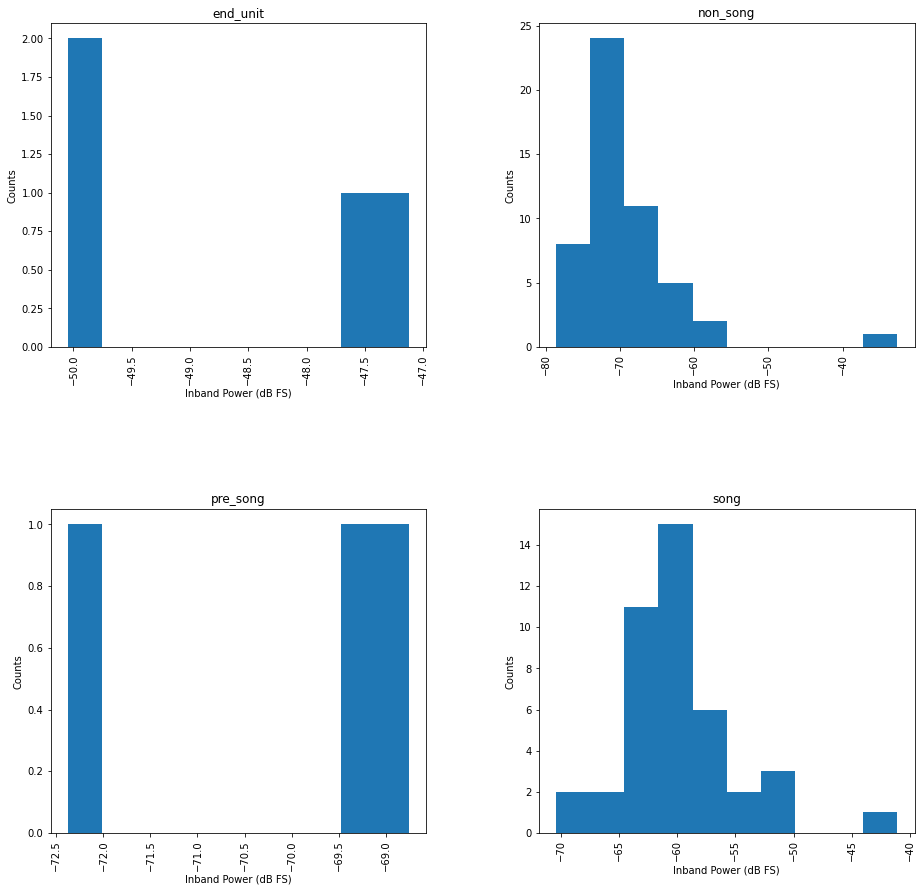

In [65]:
ax_dfplot = selection_table_df.hist(column='Inband Power (dB FS)',
                             by='Type', 
                            figsize=(15, 15))

for ax in ax_dfplot.flatten():
    ax.set_xlabel("Inband Power (dB FS)")
    ax.set_ylabel("Counts")

## Loop through each row of your table, before performing to perform an action, e.g. uploading a sound file

### Use the following if you have one Raven Selection file per audio file

In [ ]:
import librosa

# Create a for loop that is going to read one line after the other
for rr in len(nonsong_df):
    
    # Get the information necessary to read the file
    begin_time = nonsong_df['Begin Time (s)'][rr]
    end_time = nonsong_df['End Time (s)'][rr]
    file_name = nonsong_df['Begin Path'][rr]
    
    # Load the audio (there is no audio linked here, so the following is commented out)
    # x, fs = librosa.load(file_name, offset=begin_time, duration=end_time-begin_time  sr=None, mono=False)

### Use the following if you have one Raven Selection file for a group of audio files
Make sure that you have the column 'File Offset (s)' and 'Begin Path' in your selection table!

In [ ]:
import librosa

# Create a for loop that is going to read one line after the other
for rr in len(nonsong_df):
    
    # Get the information necessary to read the file
    file_offset = nonsong_df['File Offset (s)'][rr]
    begin_time = nonsong_df['Begin Time (s)'][rr]
    end_time = nonsong_df['End Time (s)'][rr]   

    file_name = nonsong_df['Begin Path'][rr]
    
    # Load the audio (there is no audio linked here, so the following is commented out)
    # x, fs = librosa.load(file_name, offset=file_offset, duration=end_time-begin_time  sr=None, mono=False)